In [29]:
from keras.applications import VGG16
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from keras.preprocessing import backend as K
import cv2

ImportError: No module named cv2

In [6]:
model = VGG16(weights='imagenet')

In [14]:
img_path = '/Users/Wolf-Pack/Desktop/Experiments/dogs_cats/all/cats_dogs_small/test/dogs/dog_test.jpg'

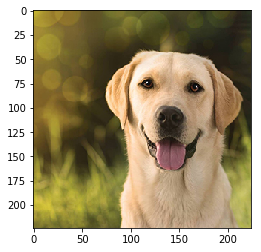

In [20]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor /= 255.
plt.imshow(img_tensor)
plt.show()

In [21]:

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

('Predicted:', [(u'n02099712', u'Labrador_retriever', 0.696929), (u'n02099601', u'golden_retriever', 0.15857281), (u'n02090379', u'redbone', 0.030390598)])


In [22]:
np.argmax(preds[0])   # class number with highest prediction

208

In [23]:
labrador_output = model.output[:, 208]

In [24]:
last_conv_layer = model.get_layer('block5_conv3')

In [27]:
grads = K.gradients(labrador_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

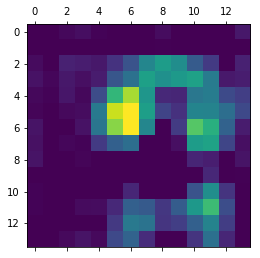

In [32]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap,cmap='viridis')

Labrador Dog class activation over the test image